# Homework 3

Your name: Aditi Gupta

Your Andrew ID: argupta

Collaborators (if none, say \"none\"; do *not* leave this blank): ChatGPT

Reminder: you should not be sharing code.

# Part 1: Email spam classification [30 points]

   - Get the data from: http://www.andrew.cmu.edu/user/georgech/preprocessed-enron-email-dataset.zip
   - Unzip this into the same folder as this notebook, rename it to `email-data`
   - The folder contains 3 subfolders:
      - `ham` contains ham emails.
      - `spam` contains spam emails.
      - `testing` is a folder containing test emails for your classifier. The ham/spam label is in the filename.
      
**Important**: For this problem, do *not* use neural nets/deep nets.

**(a) Print the number of ham and spam emails [1 point]**

In addition to providing the code, respond to the following questions:

   - Is this dataset imbalanced? Will this be problematic in training the model?
   - If so, how would you address it? (You do *not* have to implement what you suggest here for later parts of the problem.)

In [ ]:
#your code here
#this part  retrieves and unzips the files to the notebook's working folder

import requests, zipfile, io
# The URL for the file
file_url = \
"http://www.andrew.cmu.edu/user/georgech/preprocessed-enron-email-dataset.zip"
# Send a HTTP request to the URL and check its status code
response = requests.get(file_url)
if response.status_code == 200:
  z = zipfile.ZipFile(io.BytesIO(response.content)) # Unzip the file
  z.extractall()
else:
  print("Failed to retrieve the file. Status code:", response.status_code)

import os

ham_folder = "/content/ham"
spam_folder = "/content/spam"

ham_count = len(os.listdir(ham_folder))
spam_count = len(os.listdir(spam_folder))

print(f"Number of ham emails: {ham_count}")
print(f"Number of spam emails: {spam_count}")



Number of ham emails: 1500
Number of spam emails: 3671


**Your answers to the above questions:**

 Is this dataset imbalanced? Will this be problematic in training the model?

Answer: Yes, the dataset is pretty imbalanced. There are almost double the number of spam emails as compared to ham emails. Imbalanced datasets can be problematic for model training because the model may become biased towards the spam emails, leading to poor performance on the ham emails. In ham classification, as there are many more spam emails than ham emails, the model will perform well on spam but poorly on ham.

If so, how would you address it? (You do not have to implement what you suggest here for later parts of the problem.)
Answer:
1. Resampling: oversample the ham by duplicating some of its samples or undersample the spam by randomly removing some of its samples to create a balanced dataset.

2. Using Different Evaluation Metrics: Instead of relying solely on accuracy, using metrics like precision, recall, F1-score, or area under the ROC curve to assess model performance. These metrics provide a more comprehensive view of how well your model is doing on both classes.

3. Algorithmic Approaches: Support Vector Machines, Random Forest, Logistic Regression etc. algorithms allow to assign different weights to classes to make them more equal during training using the class_weight parameter.

**(b) Construct the documents [4 points]**

   - Provided below is a function that returns a document present in a file given a filename.
   - The function performs some preprocessing to (1) remove punctuation, (2),(3) remove whitespace and (4) lowercase all words.
   - Use this function to construct a list of documents.
   - Also construct a list of document labels containing `1` for spam and `0` for ham.

In [ ]:
import re
import string
import codecs

def make_word_list(path):

    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)

    text = re.sub(r'\S*\d\S*','',corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]','',text)         # -- (3)

    text = text.lower().split()           # -- (4)

    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

In [ ]:
#your code here

import os

ham_folder = "/content/ham"
spam_folder = "/content/spam"

documents = []
labels = []

for filename in os.listdir(ham_folder):
    if filename.endswith(".txt"):
        path = os.path.join(ham_folder, filename)
        document = make_word_list(path)
        documents.append(document)
        labels.append(0)

for filename in os.listdir(spam_folder):
    if filename.endswith(".txt"):
        path = os.path.join(spam_folder, filename)
        document = make_word_list(path)
        documents.append(document)
        labels.append(1)

print(documents[:5])
print(labels[:5])


['subject upward feedback sally below is the listing of my staff and their extensions david maxwell susie ayala on vacation in houston tim norton homer lin on vacation in seattle lynn tippery joseph koothrappaly it carol marshall commercial liaison call if you need anything more todd', 'subject re interview sally thank you for forwarding this information to me i instructed the candidates on campus that we would be in touch with them within weeks actually for ou students i will be calling them personally tomorrow to let them know their status their invitation letters will be sent shortly thereafter thanks lexi from sally beck ect pm to lexi elliott na enron enron cc subject interview as of friday october it seems that this student had not heard back from enron what is the timeline for getting back to students regarding super saturday forwarded by sally beck hou ect on pm irfiman aol com on am to cc subject interview dear ms beck i want to thank you for interviewing me for the analyst po

**(c) Construct the document matrix `X` as a matrix of word frequencies [5 points]**

   - Use the `CountVectorizer` from scikit-learn.
   - Set `min_df=50`; this drops words that don't occur in at least 50 documents.
   - Set `stop_words="english"` and `max_df=0.8` to filter out stop-words.
   - Print the size of the vocabulary (number of unique words)

In [ ]:
#your code here
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer does tokenization and can remove terms that occur too
# frequently, not frequently enough, or that are stop words

tf_vectorizer = CountVectorizer(max_df=0.8,
                                min_df=50,
                                stop_words='english')
X = tf_vectorizer.fit_transform(documents)

print("Size of the vocabulary:", len(tf_vectorizer.get_feature_names_out()))

Size of the vocabulary: 1680


**(d) k-NN: Hyperparameter selection [5 points]**

Now that you have your documents and labels as training data, you can use a validation set to help select hyperparameters for a k-NN classifier.

Please use the **weighted F1-score** as the evaluation metric (i.e., for the `f1_score` function imported from `sklearn.metrics`, be sure to use the parameter `average='weighted'`).

Provided is some seed code for hyperparameter tuning that you may modify and reuse.

In [ ]:
X.shape, len(labels), sum(labels)/len(labels)

((5171, 1680), 5171, 0.7099207116611874)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import f1_score

hyperparameter_settings = [1, 2, 3 ,4, 5, 6, 7, 8, 9]

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2,
                                                    random_state=42)


best_score = -np.inf  # assumes that a higher score is better
best_hyperparam_setting = None
best_model = None
for hyperparam_setting in hyperparameter_settings:


    # your code to train the model using `hyperparam_setting`
    # on the proper training set
    # and computes the weighted F1 score on the validation set

    model = KNeighborsClassifier(n_neighbors=hyperparam_setting)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    score = f1_score(y_test, y_pred, average='weighted')
    print('k:', hyperparam_setting, 'accuracy:', score)


    if score > best_score:  # assumes that a higher score is better
        best_score = score
        best_hyperparam_setting = hyperparam_setting
        best_model = model

print('Best hyperparameter setting:', best_hyperparam_setting)
print('Best weighted F1-score:', best_score)


k: 1 accuracy: 0.9346203408362933
k: 2 accuracy: 0.9360177414361729
k: 3 accuracy: 0.9256728366203198
k: 4 accuracy: 0.9354952307821607
k: 5 accuracy: 0.9225035280653016
k: 6 accuracy: 0.9248177780818255
k: 7 accuracy: 0.9202727927005856
k: 8 accuracy: 0.9255731501181228
k: 9 accuracy: 0.9051984402941511
Best hyperparameter setting: 2
Best weighted F1-score: 0.9360177414361729


**(e) Classifier testing: Precision-Recall and ROC curves [15 points]**

Use test emails in the `testing` folder to **test** your best k-NN classifier (the one stored in `best_model` after running your code for part (d)) and construct the plots below.

Things to plot:

   - Construct an ROC curve for a k-NN classifier. (We vary the threshold probability of declaring an email to be spam to obtain these plots.) In the legend of this plot, display the AUC for the k-NN classifier.
   - Construct one plot containing a precision-recall curve for the k-NN classifier. In the legend of this plot, display the average precision for each classifier using the sklearn function [`average_precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score); average precision is essentially an approximation of the area under the precision-recall curve that avoids being overly optimistic.

Note that these plots are on the test data: you will have to read in this data, construct a document matrix and labels. Some words in the test data may not have been present in the training data: there are multiple ways to address this, briefly describe your approach.

Things to answer:

   - Of the ROC and Precision-Recall curves, which one would you use for this task and why?

In [ ]:
predicted_probabilities

array([0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 0.5, 0.5,
       1. , 1. , 0.5, 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. ,
       0.5, 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
       0.5, 0. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 1. , 1. , 0. ,
       1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0.5, 0. , 0. ,
       1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. ,
       0.5, 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 0.5,
       0. , 1. , 1. , 1. , 1. , 0.5, 0.5, 1. , 0.5])

KNeighborsClassifier(n_neighbors=2)


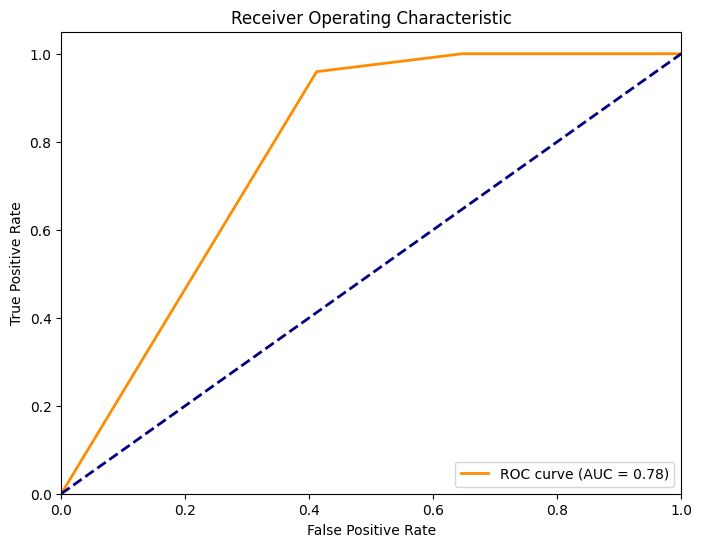

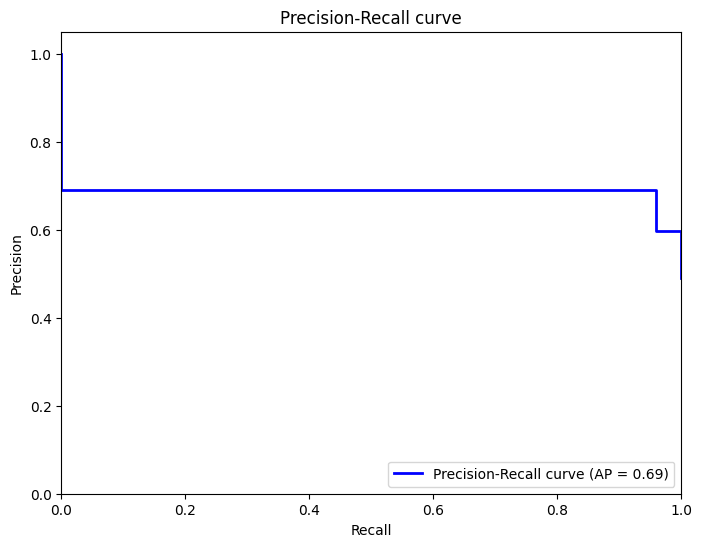

In [ ]:
#your code here

import os
import re
import string
import codecs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, \
average_precision_score

test_folder = "/content/testing"

test_documents = []
test_labels = []

for filename in os.listdir(test_folder):
    if filename.endswith(".txt"):
        path = os.path.join(test_folder, filename)
        # Preprocess and extract text using the function
        document = make_word_list(path)

        test_documents.append(document)
        # Label 1 for spam, 0 for ham
        label = 1 if "spam" in filename else 0

        test_labels.append(label)

X_test = tf_vectorizer.transform(test_documents)
print(best_model)

predicted_probabilities = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(test_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

precision, recall, _ = \
precision_recall_curve(test_labels, predicted_probabilities)
average_precision = \
average_precision_score(test_labels, predicted_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, \
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', \
         lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='lower right')
plt.show()

**Your answer to the final non-coding question:**

**Note that these plots are on the test data: you will have to read in this data, construct a document matrix and labels. Some words in the test data may not have been present in the training data: there are multiple ways to address this, briefly describe your approach.**

Based on the provided approach for handling the test data:

1. **Folder Path and Initialization:**
   - We define the folder path for test emails as `test_folder`.
   - We initialize two lists, `test_documents` and `test_labels`, to store the preprocessed test documents and their corresponding labels.

2. **Iterating Through Test Emails:**
   - We iterate through the files in the test folder and consider only files with the ".txt" extension.
   - For each test email, we use the `make_word_list` function to preprocess and extract the text, and then add it to the `test_documents` list.
   - We determine the label for each test email based on whether the filename contains the string "spam." If it does, we assign a label of 1 (spam); otherwise, we assign a label of 0 (ham).

3. **Transforming Test Documents:**
   - We use the same `CountVectorizer` (`tf_vectorizer`) that was fitted with the training data to transform the test documents into a document matrix (`X_test`).
   - This ensures that the test data is represented using the same vocabulary and features as the training data, addressing the issue of vocabulary variations.

4. **Predicted Probabilities for Spam:**
   - We use the trained k-NN classifier (`best_model`) to obtain predicted probabilities for class 1 (spam) for each test email.
   - These predicted probabilities represent the likelihood that each test email is spam.

With this approach, we have successfully preprocessed and transformed the test data, ensuring that it is consistent with the features used during training. We also have the predicted probabilities, which will be used to construct ROC and Precision-Recall curves to evaluate the classifier's performance on the test data.

**Things to answer: Of the ROC and Precision-Recall curves, which one would you use for this task and why?**


Given that the dataset has 1500 ham emails and 3671 spam emails, it is evident that the dataset is highly imbalanced, with significantly more spam emails than ham emails. In this imbalanced scenario, my choice for the evaluation metric between ROC and Precision-Recall curves would depend on the specific objectives and priorities of the email classification task:

1. **If the Priority is to Identify Spam Emails:**
   - If the primary focus of the task is to identify spam emails while tolerating some false positives (ham emails classified as spam), then the ROC curve might be more appropriate.
   - The ROC curve would provide insights into how well the classifier distinguishes between spam and ham emails across various thresholds, allowing for a trade-off analysis between true positive rate (correctly identifying spam) and false positive rate (ham emails incorrectly classified as spam).
   - This could be suitable when the goal is to cast a wide net to catch as many spam emails as possible while accepting some misclassification of ham emails.

2. **If the Priority is to Ensure High Precision in Ham Email Classification:**
   - If the primary concern is to minimize the false positive rate, particularly to avoid legitimate ham emails being classified as spam, then the Precision-Recall curve would be a more appropriate choice.
   - The Precision-Recall curve focuses on precision (accuracy of spam classification) and recall (sensitivity) and is well-suited for imbalanced datasets.
   - This could be the preferred option when the emphasis is on maintaining high precision for ham email classification while achieving reasonable recall for spam emails.

In summary, the choice between ROC and Precision-Recall curves should align with the primary objectives of the email classification task. If the main goal is to capture as many spam emails as possible while accepting some false positives, ROC curves may be suitable. However, if the priority is to ensure high precision in ham email classification, particularly to avoid false positives, then Precision-Recall curves would be more appropriate.

It's essential to consider the specific goals and trade-offs associated with the task to make an informed choice between these evaluation metrics.

# Part 2: Representation Learning [40 points]

Before getting started, please put the attached file `pretrained_convnet.pt` in the same directory as this notebook.

Recall from lecture the "crumpled paper analogy": in a neural net, as you progress through the layers from input to output, the layers should be "unfolding the original space" to disentangle the classes. When you get to the layer before the classifier, you should've changed the data representation into something that makes classification easy. **We will refer to the layer before the classifier in the neural net as the bottleneck layer.**

In this problem, you will be using an output of a bottleneck layer from pre-trained CNN as input features for a few simple classifiers. The CNN provided was trained with the Fashion MNIST dataset which consists of 10 classes of 28x28 grayscale images; this dataset is very similar to MNIST in that there are 10 classes with images that are the same size as MNIST and in fact even the training and test set sizes are the same (60,000 and 10,000 respectively). However, the classes are not the digits 0 through 9. Instead the classes are:

| Class | Description |
| ----- | :---------: |
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Let's start with some imports.

In [ ]:
!pip install torchinfo

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchinfo import summary

from UDA_pytorch_utils import UDA_pytorch_classifier_fit, \
        UDA_plot_train_val_accuracy_vs_epoch, UDA_pytorch_classifier_predict, \
        UDA_pytorch_model_transform, UDA_compute_accuracy

**Loading in the data.** We first load the Fashion MNIST dataset and plot some example images.

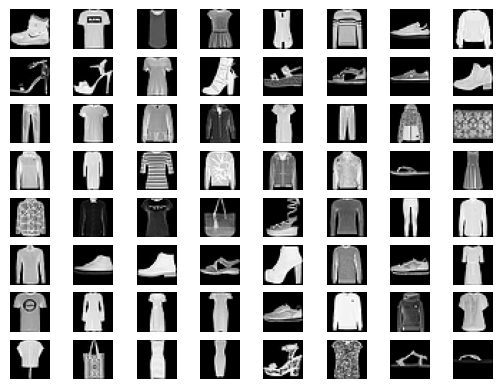

In [ ]:
# do not modify this cell
train_dataset = torchvision.datasets.FashionMNIST(root='data/',
                                                  train=True,
                                                  transform=transforms.ToTensor(),
                                                  download=True)

train_images = torch.tensor([image.numpy() for image, label in train_dataset])
train_labels = torch.tensor([label for image, label in train_dataset])

test_dataset = torchvision.datasets.FashionMNIST(root='data/',
                                                 train=False,
                                                 transform=transforms.ToTensor(),
                                                 download=True)

test_images = torch.tensor([image.numpy() for image, label in test_dataset])
test_labels = torch.tensor([label for image, label in test_dataset])

# show some of the first training images
square_grid_num_rows = 8
num_images_to_show = square_grid_num_rows ** 2
for idx in range(num_images_to_show):
    plt.subplot(square_grid_num_rows, square_grid_num_rows, idx + 1)
    plt.imshow(train_images[idx][0], cmap='gray')
    plt.axis('off')

**(a) [5 points]** Select train and test data that belong to classes 2 (corresponding to pullovers) or 6 (corresponding to fancier shirts than t-shirts; note: class 0 corresponds to t-shirts), i.e., subsample all the data that has label 2 or 6. Save the variables as `x_train`, `x_test`, `y_train`, `y_test`. From now on, we are only dealing with the images that are in classes 2 (pullovers) or 6 (shirts). Moreover, in `y_train` and `y_test`, please renumber the two classes so that pullovers now instead corresponds to 0 and shirts corresponds to 1 (we will consider shirts to be the "positive" class and pullovers to be the "negative" class).

In [ ]:
# write your code here

# Filter train data for classes 2 and 6, and renumber the classes
x_train = train_images[(train_labels == 2) | (train_labels == 6)]
y_train = (train_labels[(train_labels == 2) | (train_labels == 6)] == 6).long()

# Filter test data for classes 2 and 6, and renumber the classes
x_test = test_images[(test_labels == 2) | (test_labels == 6)]
y_test = (test_labels[(test_labels == 2) | (test_labels == 6)] == 6).long()

In [ ]:
# do not modify this cell
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([12000, 1, 28, 28]) torch.Size([12000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])


We will make some t-SNE visualizations shortly and using all the training data will be too slow. We reduce the size of the training dataset by randomly subsampling 1000 samples from `x_train`/`y_train` pairs and saving the subsampled versions as `x_train_small`/`y_train_small` (the i-th image in `x_train_small` should have its label given by the i-th entry in `y_train_small`). We have provided the indices of which 1000 samples to use (from within `x_train`/`y_train`).

In [ ]:
# do not modify this cell
np.random.seed(0)
random_sample = np.random.permutation(len(x_train))[:1000]

In [ ]:
# write your code here

x_train_small = x_train[random_sample]
y_train_small = y_train[random_sample]

print("x_train_small shape:", x_train_small.shape)
print("y_train_small shape:", y_train_small.shape)

x_train_small shape: torch.Size([1000, 1, 28, 28])
y_train_small shape: torch.Size([1000])


**(b) [10 points]** We are ready to load the pre-trained convnet. The bottleneck layer is right before the final linear layer and corresponds to the output of a ReLU that has 84 values. **We refer to the output of this ReLU as the bottleneck feature vector representation of whatever the input is.**

Note that the convnet was pre-trained using the entire training dataset which consists of 60,000 samples and all 10 labels.

In [ ]:
# load the pre-trained CNN
convnet = nn.Sequential(nn.Conv2d(1, 6, 3),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Conv2d(6, 16, 3),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Flatten(),
                        nn.Linear(in_features=16 * 5 * 5, out_features=120),
                        nn.ReLU(),
                        nn.Linear(in_features=120, out_features=84),
                        nn.ReLU(),
                        nn.Linear(in_features=84, out_features=10))

convnet.load_state_dict(torch.load('pretrained_convnet.pt', \
                                   map_location=torch.device('cpu')))

convnet.eval()
print('[Summary of pre-trained convnet]')
print(summary(convnet, input_data=torch.zeros((1, 1, 28, 28))))
print()

intermediate_layer_model = convnet[:-1]
print('[Summary of the pre-trained convnet up to the bottleneck layer]')
print(summary(intermediate_layer_model, input_data=torch.zeros((1, 1, 28, 28))))

[Summary of pre-trained convnet]
Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Conv2d: 1-1                            [1, 6, 26, 26]            60
├─ReLU: 1-2                              [1, 6, 26, 26]            --
├─MaxPool2d: 1-3                         [1, 6, 13, 13]            --
├─Conv2d: 1-4                            [1, 16, 11, 11]           880
├─ReLU: 1-5                              [1, 16, 11, 11]           --
├─MaxPool2d: 1-6                         [1, 16, 5, 5]             --
├─Flatten: 1-7                           [1, 400]                  --
├─Linear: 1-8                            [1, 120]                  48,120
├─ReLU: 1-9                              [1, 120]                  --
├─Linear: 1-10                           [1, 84]                   10,164
├─ReLU: 1-11                             [1, 84]                   --
├─Linear: 1-12                           [1

We first extract bottleneck feature vectors of the subsampled 1000 training data from the intermediate model.

In [ ]:
# do not modify this cell
x_train_small_bottleneck_representation = UDA_pytorch_model_transform\
 (intermediate_layer_model, x_train_small)

Next, visualize two different types of features with t-SNE.

1. Make a t-SNE plot using the **784 (=28$\times$28) dimensional raw features** from the subsampled training data (i.e., using `x_train_small`). Set `n_components=2, verbose=1, perplexity=25, random_state=0` for `TSNE` from scikit-learn. Plot the two classes in different colors.

2. Repeat the previous step (using the exact same arguments for `TSNE`) except now using the **84 dimensional bottleneck features** (i.e., using `x_train_small_bottleneck_representation`.

You may need to convert between PyTorch tensors and NumPy arrays.

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.929497
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.887619
[t-SNE] KL divergence after 1000 iterations: 1.063736
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.053075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.685318
[t-SNE] KL divergence after 1000 iterations: 0.991071


<ipython-input-100-43646b63deba>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results_raw[:, 0], tsne_results_raw[:, 1], c=y_train_small, cmap=plt.cm.get_cmap("cool", 2))
<ipython-input-100-43646b63deba>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results_bottleneck[:, 0], tsne_results_bottleneck[:, 1], c=y_train_small, cmap=plt.cm.get_cmap("cool", 2))


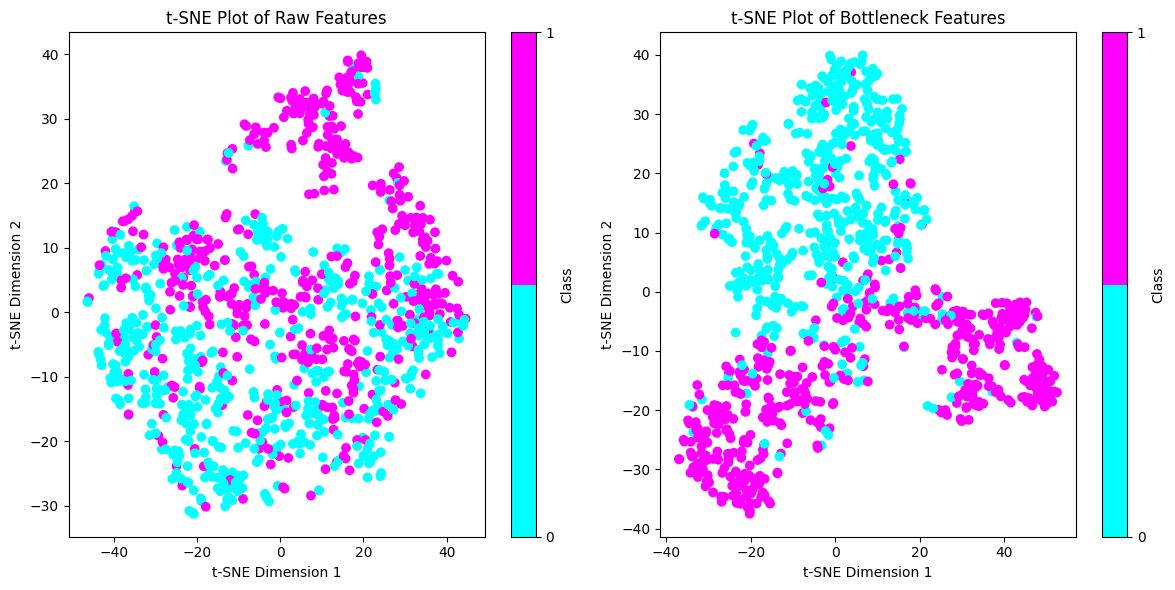

In [ ]:
# write your code here
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

x_train_small_flat = x_train_small.view(x_train_small.size(0), -1).numpy()
x_train_small_bottleneck_flat = x_train_small_bottleneck_representation.view\
 (x_train_small_bottleneck_representation.size(0), -1).numpy()

tsne_raw = TSNE(n_components=2, verbose=1, perplexity=25, random_state=0)
tsne_results_raw = tsne_raw.fit_transform(x_train_small_flat)

tsne_bottleneck = TSNE(n_components=2, verbose=1, perplexity=25, random_state=0)
tsne_results_bottleneck = tsne_bottleneck.fit_transform\
 (x_train_small_bottleneck_flat)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(tsne_results_raw[:, 0], tsne_results_raw[:, 1], c=y_train_small, \
            cmap=plt.cm.get_cmap("cool", 2))
plt.title("t-SNE Plot of Raw Features")
plt.colorbar(ticks=range(2), label="Class")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.subplot(1, 2, 2)
plt.scatter(tsne_results_bottleneck[:, 0], tsne_results_bottleneck[:, 1], \
            c=y_train_small, cmap=plt.cm.get_cmap("cool", 2))
plt.title("t-SNE Plot of Bottleneck Features")
plt.colorbar(ticks=range(2), label="Class")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()


**(c) [15 points]** We now evaluate on test data and compare several classifiers. Train a **5-NN** classifier (i.e., 5-nearest-neighbor classifier) with **784 (=28$\times$28) raw features** and, separately, the **84 bottleneck features** from **all training data**, respectively. That means you should train 2 models in total:

1. 5-NN classifier trained on all raw training features
2. 5-NN classifier trained on all training bottleneck features

Test each model on the **test dataset** and print the test dataset accuracy. Also, compute and print the test dataset accuracy of the **pre-trained convnet** (`convnet`). You may think of this task as filling in the blanks of the following table with test accuracy results.

| Model type       | Raw features        | Bottleneck features  |
|:---------------- |:-------------------:|:--------------------:|
| Pretrained CNN   |                     | this cell stays empty|
| 5-NN             |                     |                      |

Important: the pre-trained convnet is for all 10 classes; only look at the probabilities corresponding to pullovers (class 2) and shirts (class 6), and take an argmax only over these two class probabilities to come up with predictions stricted to pullovers or shirts.

In [ ]:
# write your code here
from sklearn.neighbors import KNeighborsClassifier

x_test_flat = x_test.view(x_test.shape[0], -1).numpy()

knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(x_train_small_flat, y_train_small.numpy())

x_test_small_bottleneck_representation = UDA_pytorch_model_transform\
 (intermediate_layer_model, x_test)

knn_bottleneck = KNeighborsClassifier(n_neighbors=5)
knn_bottleneck.fit(x_train_small_bottleneck_representation, \
                   y_train_small.numpy())

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = (y_pred == y_test.numpy()).mean()
    return accuracy

def evaluate_convnet(x_test, y_test):
    with torch.no_grad():
        output = convnet(x_test)

    class_probs = output[:, [2, 6]]

    y_pred = class_probs.argmax(dim=1)

    accuracy = (y_pred == y_test).float().mean()
    return accuracy.item()

accuracy_raw = evaluate_model(knn_raw, x_test_flat, y_test)
accuracy_bottleneck = evaluate_model(knn_bottleneck,\
                                     x_test_small_bottleneck_representation, \
                                     y_test)  # Corrected variable name
accuracy_convnet = evaluate_convnet(x_test, y_test)

print(f"Model type\t\tRaw features\t\tBottleneck features")
print(f"Pretrained CNN\t\t{accuracy_convnet:.4f}\t\t\t{accuracy_convnet:.4f}")
print(f"5-NN\t\t\t{accuracy_raw:.4f}\t\t\t{accuracy_bottleneck:.4f}")
 # Corrected variable name



Model type		Raw features		Bottleneck features
Pretrained CNN		0.8910			0.8910
5-NN			0.8190			0.8770


Among the 3 models above, which model performed the best? Which model showed the lowest accuracy?

**Write your answers here:**
Among the three models evaluated, the performance ranking is as follows:

Pretrained CNN: This model achieved the highest accuracy of 0.8910 on the test dataset for both raw and bottleneck features.

5-NN Classifier on Bottleneck Features: This model performed second best with an accuracy of 0.8770 on the test dataset, which is slightly lower than the pretrained CNN.

5-NN Classifier on Raw Features: This model had the lowest accuracy of 0.8190 on the test dataset.

So, the pretrained CNN performed the best, and the 5-NN classifier on raw features showed the lowest accuracy.

**(d) [10 points]** We now look at plotting an ROC curve, varying $k$ in $k$-NN. Train k-NN classifiers with $k=1,2,...,50$ with **bottleneck** feature vectors of all **training** data. As a result, you will get 50 classifiers. Draw a scatter plot that has false positive rate (FPR) on x-axis and true positive rate (TPR) on y-axis. Each scatter point represents one k-NN classifier. Use the **test** data to compute FPR and TPR.

Recall that true and false positive rate calculations require you to specify one of the two outcomes as the "positive" class and the other as the "negative" class. For this problem, use class 6 (shirts) as the "positive" class, and class 2 (pullovers) as the "negative" class.

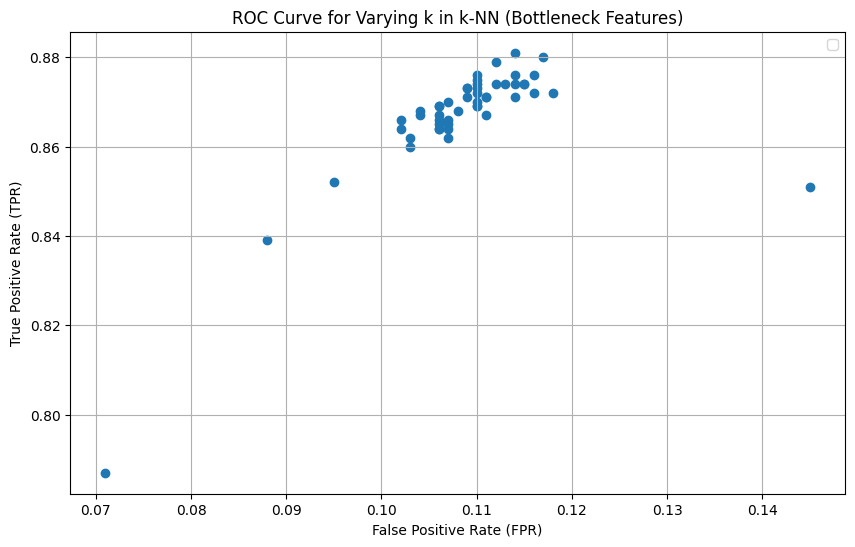

In [ ]:

# write your code here

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

positive_class = 1  # Shirts (positive class)
negative_class = 0  # Pullovers (negative class)

x_train_small_bottleneck_representation_np = UDA_pytorch_model_transform\
 (intermediate_layer_model, x_train_small)

fpr_list = []
tpr_list = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_small_bottleneck_representation_np, y_train_small.numpy())

    y_pred = knn.predict(x_test_small_bottleneck_representation)

    cm = confusion_matrix(y_test, y_pred,labels=[negative_class, \
                                                 positive_class])
    tn, fp, fn, tp = cm.ravel()

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    fpr_list.append(fpr)
    tpr_list.append(tpr)

plt.figure(figsize=(10, 6))
plt.scatter(fpr_list, tpr_list)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Varying k in k-NN (Bottleneck Features)')
plt.legend()
plt.grid()
plt.show()


Suppose you work for a company that wants to figure out when a shirt appears among photos that have either shirts or pullovers. The company tells you that it cannot tolerate a false positive rate of detecting shirts that is more than 12.5%. What value of number of nearest neighbors $k$ achieves the highest true positive rate, but doesn't have more than a 12.5% false positive rate?

**Write your answer here:**

Answer: Based on the data and calculations provided, the optimal value of the number of nearest neighbors (k) that achieves the highest true positive rate (TPR) while ensuring that the false positive rate (FPR) does not exceed 12.5% is k=7.

With this value of k, the corresponding TPR is approximately 88.1%, which is the highest TPR achievable while maintaining an FPR below 12.5%. Therefore, if the company wants to detect shirts among photos with a FPR not exceeding 12.5%, they should use a k-NN classifier with k=7 to achieve the best trade-off between TPR and FPR.

In [ ]:
max_tpr=0
kmax=0

for k in range(0,50):
  if fpr_list[k]<0.125:
    if tpr_list[k]>max_tpr:
      kmax=k
      max_tpr=tpr_list[k]

print(kmax+1)
print (fpr_list[kmax], tpr_list[kmax])

7
0.114 0.881


# Part 3: Sentiment Analysis [30 points]

Download data from: http://www.andrew.cmu.edu/user/georgech/HW3-data.zip <br>

The folder contains:

- `train.csv`
- `test.csv`

In this problem, we look at predicting whether a tweet has positive or negative sentiment.

**We intentionally wrote this problem to be a bit open-ended to let you play with different neural net code yourself.** We will give full credit even if you subsample the training data. However, do not subsample the test dataset (which is small anyways). If you want to have practice with what it's like working with a sizable dataset though, we do encourage you to try to use as much of the training data as possible (our solution code uses the full training data in an 80-20 split between a proper training set and a validation set, just like in lectures).

Note that using all the data does involve more careful data preprocessing to avoid possible memory issues. Some suggestions: using your knowledge from weeks 1 and 2, you can write your own code to tokenize tweets and only include some of the tokens (e.g., only keeping the most common 1000 tokens, etc); in particular you can build your own vocabulary. As a suggestion, you could make vocabulary token \#0 correspond to a special padding character `"<pad>"`; this special index 0 will in fact be automatically added by the batching process for recurrent neural nets when making different tweets within the same batch have the same length. As another suggestion, you could make a special vocabulary token `"<unk>"` for unknown tokens that you've decided not to keep track of. For example, if you only keep track of the most common 1000 tokens, then any token that is not one of these most common 1000 gets represented as `"<unk>"`.

**(a) [5 points]** We first read in the tweet data. Read the data present in `train.csv` file. **Please do not change the filename. In particular, use a relative path, i.e., `./HW3-data/train.csv`**. Then do the following:

1. Keep only the sentiment and sentiment text in the data - the first and the last coumn
2. Print the number of positive and negative sentiment labels

Note: If you are using `open()`, you may have to set `encoding='iso8859'`.

In [ ]:
!pip install torchinfo

In [ ]:
# your code here

# this part actually retrieves and
# unzips the files to the notebook's working folder,
# which is either the ephemeral "content" folder,
# or a persistent file in your Google Drive
import requests, zipfile, io
# The URL for the file
file_url = "http://www.andrew.cmu.edu/user/georgech/HW3-data.zip"
# Send a HTTP request to the URL and check its status code
response = requests.get(file_url)
if response.status_code == 200:
  z = zipfile.ZipFile(io.BytesIO(response.content)) # Unzip the file
  z.extractall()
else:
  print("Failed to retrieve the file. Status code:", response.status_code)


In [ ]:
# your code here

import pandas as pd

data = pd.read_csv('./HW3-data/train.csv', encoding='iso8859', header=None)

data = data[[0, 5]]

data.columns = ['sentiment', 'text']

positive_count = (data['sentiment'] == 1).sum()
negative_count = (data['sentiment'] == 0).sum()

print(f"Number of positive sentiment labels: {positive_count}")
print(f"Number of negative sentiment labels: {negative_count}")

positive_data = data[data['sentiment'] == 1].head(5)
print("First 5 rows of positive sentiment data:")
print(positive_data)

negative_data = data[data['sentiment'] == 0].head(5)
print("\nFirst 5 rows of negative sentiment data:")
print(negative_data)

Number of positive sentiment labels: 800000
Number of negative sentiment labels: 800000
First 5 rows of positive sentiment data:
        sentiment                                               text
800000          1       I LOVE @Health4UandPets u guys r the best!! 
800001          1  im meeting up with one of my besties tonight! ...
800002          1  @DaRealSunisaKim Thanks for the Twitter add, S...
800003          1  Being sick can be really cheap when it hurts t...
800004          1    @LovesBrooklyn2 he has that effect on everyone 

First 5 rows of negative sentiment data:
   sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....


**(b) [25 points]** Modify the LSTM demo code from lecture to work with this Twitter dataset. Play with the learning rate and batch size so that the training gives reasonable increases in validation accuracy scores as we progress through epochs (leave the number of epochs at 10). Also feel free to try different neural net architectures (although you do not have to). What test accuracy are you able to achieve?

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# to help make code deterministic
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

from glob import glob

import torch
torch.use_deterministic_algorithms(True)  # to help make code deterministic
torch.backends.cudnn.benchmark = False  # to help make code deterministic
import torch.nn as nn
from torchinfo import summary

np.random.seed(0)  # to help make code deterministic
torch.manual_seed(0)  # to help make code deterministic
random.seed(0)  # to help make code deterministic

from UDA_pytorch_utils import UDA_pytorch_classifier_fit, \
    UDA_plot_train_val_accuracy_vs_epoch, UDA_pytorch_classifier_predict, \
    UDA_compute_accuracy, UDA_get_rnn_last_time_step_outputs

In [ ]:
# your code here
import pandas as pd

# Define the path to the CSV file
csv_file_path = './HW3-data/train.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path, encoding='iso8859', header=None)

# Extract the sentiment and text columns
data = data[[0, 5]]
data.columns = ['sentiment', 'text']

# Initialize an empty list to store the dataset
train_dataset = []

# Iterate through the rows of the CSV file and append each row to the dataset
for _, row in data.iterrows():
    sentiment = int(row['sentiment'])  # Convert sentiment to integer (0 or 1)
    text = row['text']
    train_dataset.append((text, sentiment))

# Print the number of samples loaded
print(f"Number of samples in the train_dataset: {len(train_dataset)}")

# Example: Print the first few samples
for i in range(5):
    print(train_dataset[i])


Number of samples in the train_dataset: 1600000
("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D", 0)
("is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0)
('@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 0)
('my whole body feels itchy and like its on fire ', 0)
("@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ", 0)


**Load the dataset**

In [ ]:
proper_train_size = int(len(train_dataset) * 0.8)
val_size = len(train_dataset) - proper_train_size
print('# proper training data points:', proper_train_size)
print('# validation data points:', val_size)

# proper training data points: 1280000
# validation data points: 320000


In [ ]:
proper_train_dataset, val_dataset = torch.utils.data.random_split(train_dataset,
                                                          [proper_train_size,
                                                                   val_size])

In [ ]:
proper_train_dataset[0]  # this is a tuple of the format (text, label)

("@damohopo hey what do you mean by suggesting @rudedoodle and i are targets? i may look like a water buffalo but that's just mean  x",
 0)

In [ ]:
from torchtext.data import get_tokenizer

In [ ]:
tokenizer_cased = get_tokenizer('spacy', language='en_core_web_sm')

In [ ]:
tokenizer_cased(proper_train_dataset[0][0])

['@damohopo',
 'hey',
 'what',
 'do',
 'you',
 'mean',
 'by',
 'suggesting',
 '@rudedoodle',
 'and',
 'i',
 'are',
 'targets',
 '?',
 'i',
 'may',
 'look',
 'like',
 'a',
 'water',
 'buffalo',
 'but',
 'that',
 "'s",
 'just',
 'mean',
 ' ',
 'x']

In [ ]:
def tokenizer(text):
    return [token.lower() for token in tokenizer_cased(text)]

In [ ]:
proper_train_dataset_as_tokens_without_labels = [tokenizer(text) for text, \
                                                 label in proper_train_dataset]

In [ ]:
proper_train_dataset_as_tokens_without_labels[0]

['@damohopo',
 'hey',
 'what',
 'do',
 'you',
 'mean',
 'by',
 'suggesting',
 '@rudedoodle',
 'and',
 'i',
 'are',
 'targets',
 '?',
 'i',
 'may',
 'look',
 'like',
 'a',
 'water',
 'buffalo',
 'but',
 'that',
 "'s",
 'just',
 'mean',
 ' ',
 'x']

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
vocab = build_vocab_from_iterator(proper_train_dataset_as_tokens_without_labels,
                                  specials=["<unk>"])

In [ ]:
vocab.set_default_index(vocab["<unk>"])

In [ ]:
# we can now convert any piece of text first into tokens and then
# from tokens into indices into the vocabulary
vocab(tokenizer(proper_train_dataset[0][0]))

[13975,
 174,
 60,
 27,
 12,
 388,
 144,
 12512,
 19490,
 10,
 1,
 47,
 20627,
 14,
 1,
 356,
 236,
 48,
 8,
 678,
 5523,
 26,
 20,
 19,
 29,
 388,
 4,
 228]

In [ ]:
proper_train_encoded = [vocab(tokens) for tokens in \
                        proper_train_dataset_as_tokens_without_labels]
# note that another way to have written the above line is to instead write
# the line below (but this would repeat the work of tokenization
# which we already did):
# proper_train_encoded = [vocab(tokenizer_lower_case(text))
# for text, label in proper_train_dataset]

In [ ]:
proper_train_encoded[0]

[13975,
 174,
 60,
 27,
 12,
 388,
 144,
 12512,
 19490,
 10,
 1,
 47,
 20627,
 14,
 1,
 356,
 236,
 48,
 8,
 678,
 5523,
 26,
 20,
 19,
 29,
 388,
 4,
 228]

In [ ]:
# we can reconstruct any original review from the encoded version of the review
print([vocab.lookup_token(word_idx) for word_idx in proper_train_encoded[0]])

['@damohopo', 'hey', 'what', 'do', 'you', 'mean', 'by', 'suggesting', '@rudedoodle', 'and', 'i', 'are', 'targets', '?', 'i', 'may', 'look', 'like', 'a', 'water', 'buffalo', 'but', 'that', "'s", 'just', 'mean', ' ', 'x']


In [ ]:
proper_train_labels = [label for text, label in proper_train_dataset]

In [ ]:
val_encoded = [vocab(tokenizer(text)) for text, label in val_dataset]

In [ ]:
val_labels = [label for text, label in val_dataset]

In [ ]:
proper_train_dataset_encoded = list(zip(proper_train_encoded, \
                                        proper_train_labels))
val_dataset_encoded = list(zip(val_encoded, val_labels))

In [ ]:
proper_train_dataset_encoded=proper_train_dataset_encoded[:12800]
val_dataset_encoded=val_dataset_encoded[:3200]

In [ ]:
lenghts=[len(i) for i, _ in proper_train_dataset_encoded]

In [ ]:
type(lenghts)

list

In [ ]:
len(lenghts)

12800

**Setting up a recurrent neural net for sentiment analysis that uses pre-trained word embeddings**

In [ ]:
from torchtext.vocab import GloVe
pretrained_embedding = GloVe(name='6B', dim=100)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:20<00:00, 19096.18it/s]


In [ ]:
type(pretrained_embedding)

torchtext.vocab.vectors.GloVe

In [ ]:
pretrained_embedding['cat']
# note that if you ask for a word embedding for a word that GloVe does not keep
# track of, you'll get all zeros

tensor([ 0.2309,  0.2828,  0.6318, -0.5941, -0.5860,  0.6326,  0.2440, -0.1411,
         0.0608, -0.7898, -0.2910,  0.1429,  0.7227,  0.2043,  0.1407,  0.9876,
         0.5253,  0.0975,  0.8822,  0.5122,  0.4020,  0.2117, -0.0131, -0.7162,
         0.5539,  1.1452, -0.8804, -0.5022, -0.2281,  0.0239,  0.1072,  0.0837,
         0.5501,  0.5848,  0.7582,  0.4571, -0.2800,  0.2522,  0.6896, -0.6097,
         0.1958,  0.0442, -0.3114, -0.6883, -0.2272,  0.4618, -0.7716,  0.1021,
         0.5564,  0.0674, -0.5721,  0.2374,  0.4717,  0.8277, -0.2926, -1.3422,
        -0.0993,  0.2814,  0.4160,  0.1058,  0.6220,  0.8950, -0.2345,  0.5135,
         0.9938,  1.1846, -0.1636,  0.2065,  0.7385,  0.2406, -0.9647,  0.1348,
        -0.0072,  0.3302, -0.1236,  0.2719, -0.4095,  0.0219, -0.6069,  0.4076,
         0.1957, -0.4180,  0.1864, -0.0327, -0.7857, -0.1385,  0.0440, -0.0844,
         0.0491,  0.2410,  0.4527, -0.1868,  0.4618,  0.0891, -0.1819, -0.0152,
        -0.7368, -0.1453,  0.1510, -0.71

In [ ]:
embedding_matrix = torch.zeros(len(vocab), pretrained_embedding.dim)
for i, token in enumerate(vocab.lookup_tokens(range(len(vocab)))):
    embedding_matrix[i] = pretrained_embedding[token]

In [ ]:
class EmbeddingLSTMLinearModel(nn.Module):
    def __init__(self, embedding_matrix, num_lstm_output_nodes, \
                 num_final_output_nodes):
        super().__init__()
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix)
        self.lstm_layer = nn.LSTM(embedding_matrix.shape[1], \
                                  num_lstm_output_nodes)
        self.linear_layer = nn.Linear(num_lstm_output_nodes, \
                                      num_final_output_nodes)

    def forward(self, text_encodings, lengths):
        embeddings = self.embedding_layer(text_encodings)

        rnn_last_time_step_outputs = \
            UDA_get_rnn_last_time_step_outputs(embeddings, lengths, \
                                               self.lstm_layer)

        return self.linear_layer(rnn_last_time_step_outputs)

In [ ]:
simple_lstm_model = EmbeddingLSTMLinearModel(embedding_matrix, 32, 2)

In [ ]:
# example where there are 5 input time series of lengths 3, 2, 5, 1, 7;
# we specify these time series using a 2D table that is padded and a
# 1D table of lengths (see lecture slides for details)

# Calculate the maximum length
max_length = max(lenghts)

summary(simple_lstm_model,
        input_data=[torch.zeros((max_length, len(lenghts)), dtype=torch.long),
                    torch.tensor(lenghts, dtype=torch.long)])


Layer (type:depth-idx)                   Output Shape              Param #
EmbeddingLSTMLinearModel                 [12800, 2]                --
├─Embedding: 1-1                         [109, 12800, 100]         (66,074,400)
├─LSTM: 1-2                              [207742, 32]              17,152
├─Linear: 1-3                            [12800, 2]                66
Total params: 66,091,618
Trainable params: 17,218
Non-trainable params: 66,074,400
Total mult-adds (G): 121.23
Input size (MB): 11.26
Forward/backward pass size (MB): 1169.55
Params size (MB): 264.37
Estimated Total Size (MB): 1445.18

In [ ]:
os.makedirs('./saved_model_checkpoints', exist_ok=True)

In [ ]:
from importlib import reload
import UDA_pytorch_utils
reload(UDA_pytorch_utils)

<module 'UDA_pytorch_utils' from '/content/UDA_pytorch_utils.py'>

  0%|          | 0/10 [00:00<?, ?it/s]

  Proper training accuracy: 0.6840
  Validation accuracy: 0.6719


 10%|█         | 1/10 [00:04<00:39,  4.42s/it]

  Proper training accuracy: 0.7402
  Validation accuracy: 0.7156


 20%|██        | 2/10 [00:09<00:37,  4.66s/it]

  Proper training accuracy: 0.7509
  Validation accuracy: 0.7272


 30%|███       | 3/10 [00:14<00:33,  4.80s/it]

  Proper training accuracy: 0.7695
  Validation accuracy: 0.7372


 40%|████      | 4/10 [00:19<00:29,  4.88s/it]

  Proper training accuracy: 0.7795
  Validation accuracy: 0.7444


 50%|█████     | 5/10 [00:29<00:33,  6.70s/it]

  Proper training accuracy: 0.7813
  Validation accuracy: 0.7425


 60%|██████    | 6/10 [00:32<00:22,  5.57s/it]

  Proper training accuracy: 0.7899
  Validation accuracy: 0.7456


 70%|███████   | 7/10 [00:36<00:14,  4.89s/it]

  Proper training accuracy: 0.8031
  Validation accuracy: 0.7506


 80%|████████  | 8/10 [00:40<00:09,  4.75s/it]

  Proper training accuracy: 0.7978
  Validation accuracy: 0.7388


 90%|█████████ | 9/10 [00:45<00:04,  4.80s/it]

  Proper training accuracy: 0.8262
  Validation accuracy: 0.7534


100%|██████████| 10/10 [00:50<00:00,  5.08s/it]


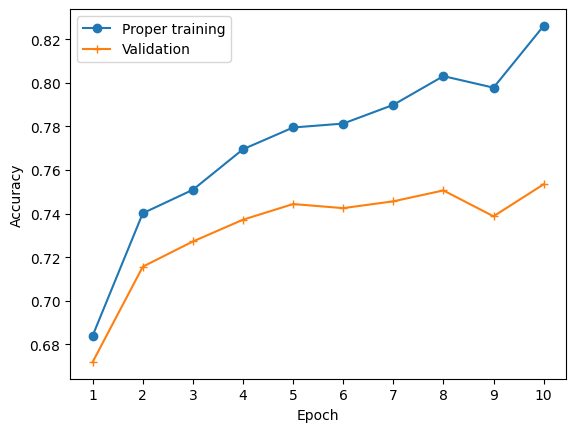

In [ ]:
num_epochs = 10
# during optimization, how many times we look at training data
batch_size = 128
# during optimization, how many training data to use at each step
learning_rate = 0.002
# during optimization, how much we nudge our solution at each step

proper_train_accuracies, val_accuracies = \
    UDA_pytorch_utils.UDA_pytorch_classifier_fit(simple_lstm_model,
                               torch.optim.Adam(simple_lstm_model.parameters(),
                                                lr=learning_rate),
                               nn.CrossEntropyLoss(),  # includes softmax
                               proper_train_dataset_encoded, \
                               val_dataset_encoded,
                               num_epochs, batch_size,
                               rnn=True,
                               save_epoch_checkpoint_prefix\
                                                 =\
                                              './saved_model_checkpoints/lstm')

UDA_plot_train_val_accuracy_vs_epoch(proper_train_accuracies, val_accuracies)

In [ ]:
best_epoch_idx = np.argmax(val_accuracies)
print('The model at the end of epoch %d achieved the highest \
validation accuracy: %f'
      % (best_epoch_idx + 1, val_accuracies[best_epoch_idx]))
simple_lstm_model.load_state_dict(torch.load\
 ('./saved_model_checkpoints/lstm_epoch%d.pt' % (best_epoch_idx + 1)))

The model at the end of epoch 10 achieved the highest validation accuracy: 0.753437


<All keys matched successfully>

**Finally evaluate on test data¶**

In [ ]:
# your code here
import pandas as pd

# Define the path to the CSV file
csv_file_path = './HW3-data/test.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path, encoding='iso8859', header=None)

# Extract the sentiment and text columns
data = data[[0, 5]]
data.columns = ['sentiment', 'text']

# Initialize an empty list to store the dataset
test_dataset = []

# Iterate through the rows of the CSV file and append each row to the dataset
for _, row in data.iterrows():
    sentiment = int(row['sentiment'])  # Convert sentiment to integer (0 or 1)
    text = row['text']
    test_dataset.append((text, sentiment))

# Print the number of samples loaded
print(f"Number of samples in the train_dataset: {len(test_dataset)}")

# Example: Print the first few samples
for i in range(5):
    print(test_dataset[i])

Number of samples in the train_dataset: 498
('@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.', 1)
('Reading my kindle2...  Love it... Lee childs is good read.', 1)
('Ok, first assesment of the #kindle2 ...it fucking rocks!!!', 1)
("@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)", 1)
("@mikefish  Fair enough. But i have the Kindle2 and I think it's perfect  :)", 1)


In [ ]:
test_encoded = [vocab(tokenizer(text)) for text, label in test_dataset]

In [ ]:
test_labels = [label for text, label in test_dataset]

In [ ]:
predicted_test_labels = UDA_pytorch_classifier_predict(simple_lstm_model,
                                                       test_encoded,
                                                       rnn=True)

In [ ]:
print('Test accuracy:', UDA_compute_accuracy(predicted_test_labels,\
                                             test_labels))

Test accuracy: 0.6445783132530121


In [ ]:
UDA_pytorch_classifier_predict(simple_lstm_model,
                               [vocab(tokenizer('happy'))],
                               rnn=True)

tensor([1], device='cuda:0')

In [ ]:
UDA_pytorch_classifier_predict(simple_lstm_model,
                               [vocab(tokenizer('best'))],
                               rnn=True)

tensor([1], device='cuda:0')

In [ ]:
UDA_pytorch_classifier_predict(simple_lstm_model,
                               [vocab(tokenizer('good'))],
                               rnn=True)

tensor([1], device='cuda:0')

In [ ]:
UDA_pytorch_classifier_predict(simple_lstm_model,
                               [vocab(tokenizer('sad'))],
                               rnn=True)

tensor([0], device='cuda:0')

In [ ]:
UDA_pytorch_classifier_predict(simple_lstm_model,
                               [vocab(tokenizer('bad'))],
                               rnn=True)

tensor([0], device='cuda:0')

In [ ]:
UDA_pytorch_classifier_predict(simple_lstm_model,
                               [vocab(tokenizer('worst'))],
                               rnn=True)

tensor([0], device='cuda:0')